# 0. Meta

## 0.1. Modules

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns



## 0.2. Functions

# 1. Data Import


In [3]:
# Define the path to the data file relative to the working directory
base_path = os.path.join('..', 'data', 'raw')
file_path = os.path.join(base_path, 'asset_close_prices_monthly_usd.csv')

# Load the CSV into a DataFrame
asset_prices_monthly_usd_df = pd.read_csv(file_path, index_col=0)

In [4]:
asset_prices_monthly_usd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 1996-11-01 to 2024-10-01
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   currency_chf                    253 non-null    float64
 1   currency_jpy                    336 non-null    float64
 2   currency_eur                    251 non-null    float64
 3   govbond_usa                     183 non-null    float64
 4   govbond_japan                   130 non-null    float64
 5   govbond_germany                 158 non-null    float64
 6   commodity_gold                  162 non-null    float64
 7   commodity_diversified_ex_agliv  174 non-null    float64
 8   commodity_diversified           201 non-null    float64
 9   equity_small_cap                131 non-null    float64
 10  equity_momentum                 120 non-null    float64
 11  equity_value                    120 non-null    float64
 12  equity_growth            

In [5]:
# Create a new DataFrame for prices converted to EUR
asset_prices_monthly_eur_df = asset_prices_monthly_usd_df.copy()

# Replace NaN values for easier numeric operations (keep them as NaN, no string 'NA')
asset_prices_monthly_eur_df = asset_prices_monthly_eur_df.astype(float)

# Extract the EUR/USD conversion rates from the 'currency_eur' column
eur_usd_rates = asset_prices_monthly_eur_df['currency_eur']

# Create a new column 'currency_usd' representing USD converted to EUR (inverse of EUR/USD)
asset_prices_monthly_eur_df['currency_usd'] = 1 / eur_usd_rates

# Loop through each column (excluding 'currency_eur' itself)
for column in asset_prices_monthly_usd_df.columns:
    if column != 'currency_eur':
        # Convert each price to EUR by dividing by the EUR/USD rate where available
        asset_prices_monthly_eur_df[column] = asset_prices_monthly_usd_df[column] / eur_usd_rates

# Remove the 'currency_eur' column as it is no longer needed
asset_prices_monthly_eur_df = asset_prices_monthly_eur_df.drop(columns=['currency_eur'])

# 2. Explorative Data Analysis and preprocessing

## Create data for pre-processing

For the next steps, a duplicate of the raw data is created in order to save the changes made to the original data during the pre-processing steps.

In [6]:
df_interim = asset_prices_monthly_eur_df.copy()
df_interim

,currency_chf,currency_jpy,govbond_usa,govbond_japan,govbond_germany,commodity_gold,commodity_diversified_ex_agliv,commodity_diversified,equity_small_cap,equity_momentum,...,equity_quality,equity_min_volatility,equity_emerging_markets,equity_sri,equity_dividend,equity_acwi_imi,equity_large_cap_us,equity_large_cap_global,crypto_bitcoin,currency_usd
Date,,,,,,,,,,,,,,,,,,,,,
1996-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,1.032895,0.005797,178.238981,6.684661,161.650908,42.237321,36.417271,24.058997,94.053468,72.974448,...,63.526200,58.545581,2529.482481,138.972304,61.063872,198.012219,505.206273,77.665928,58460.045720,0.93270
2024-07-01,1.048207,0.006056,179.737149,7.048954,162.868738,43.576354,34.592041,22.517416,99.416865,70.802044,...,62.915633,60.696711,2493.511456,138.867413,62.855535,197.160296,498.424904,75.286110,59743.730120,0.92455
2024-08-01,1.064054,0.006185,177.672147,7.030950,159.668994,44.008977,33.773439,21.668879,97.071514,70.376396,...,63.325200,61.851676,2396.503904,133.810079,62.647200,191.647992,483.450121,72.555039,53308.786052,0.90400


## Check scales of variables

Check for correct assignment of scales.

In [7]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 1996-11-01 to 2024-10-01
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   currency_chf                    251 non-null    float64
 1   currency_jpy                    251 non-null    float64
 2   govbond_usa                     183 non-null    float64
 3   govbond_japan                   130 non-null    float64
 4   govbond_germany                 158 non-null    float64
 5   commodity_gold                  162 non-null    float64
 6   commodity_diversified_ex_agliv  174 non-null    float64
 7   commodity_diversified           201 non-null    float64
 8   equity_small_cap                131 non-null    float64
 9   equity_momentum                 120 non-null    float64
 10  equity_value                    120 non-null    float64
 11  equity_growth                   201 non-null    float64
 12  equity_quality           

## Missing entries

Visualize missing values with heatmap and bar charts.

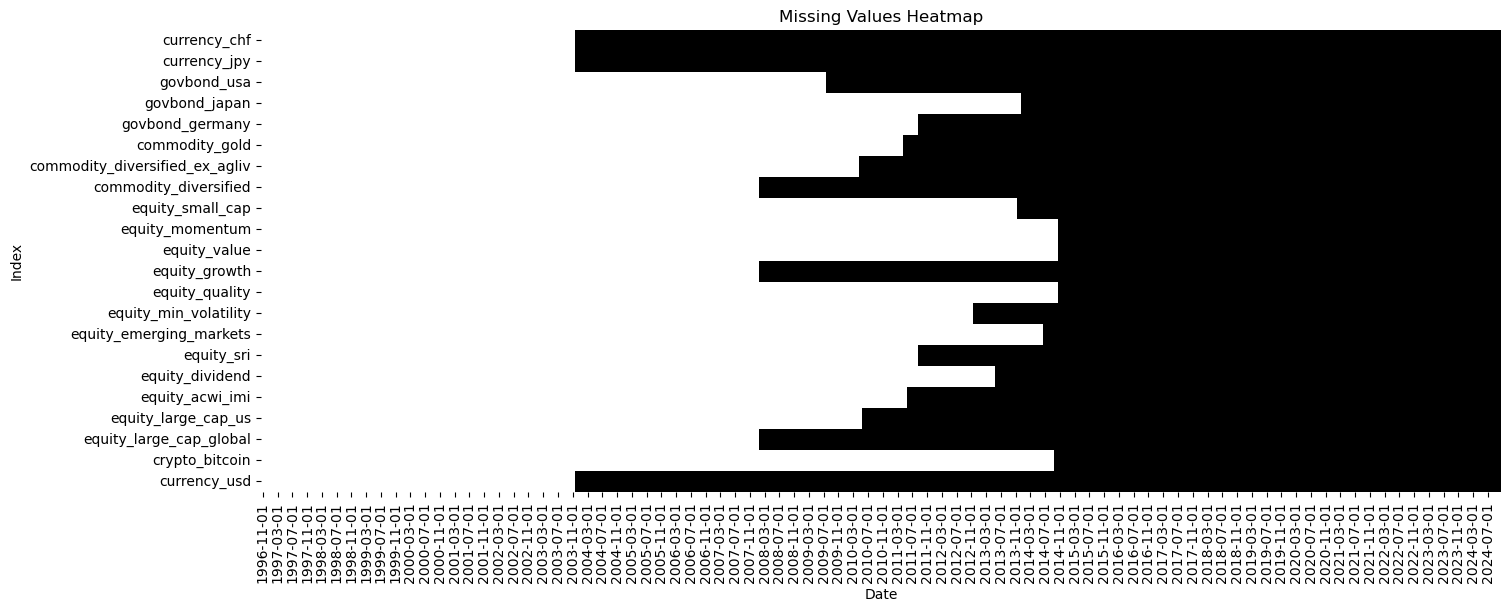

In [8]:
# Ensure that the index is a DatetimeIndex
df_interim.index = pd.to_datetime(df_interim.index)

# Create a new column from the index, as the index contains the date
df_interim['Date_str'] = df_interim.index.strftime('%Y-%m-%d')

# Visualize missing values as a heatmap
fig, ax = plt.subplots(figsize=(16, 6))

# Create the heatmap of missing values
sns.heatmap(
    df_interim.set_index('Date_str').transpose().isnull(),
    cbar=False,
    cmap=sns.color_palette(['black', 'white']),
    yticklabels=True,
    ax=ax
)

# Adjust axis titles
ax.set_title('Missing Values Heatmap')
ax.set_xlabel('Date')
ax.set_ylabel('Index')

plt.show()


Retain only rows with no missing entries.

In [9]:
# drop any rows that contain NaN and str-type values
df_interim = df_interim.drop(columns=['Date_str']).copy()

## Visualization of Indexes performances

Plotting Index prices over time using lineplots.

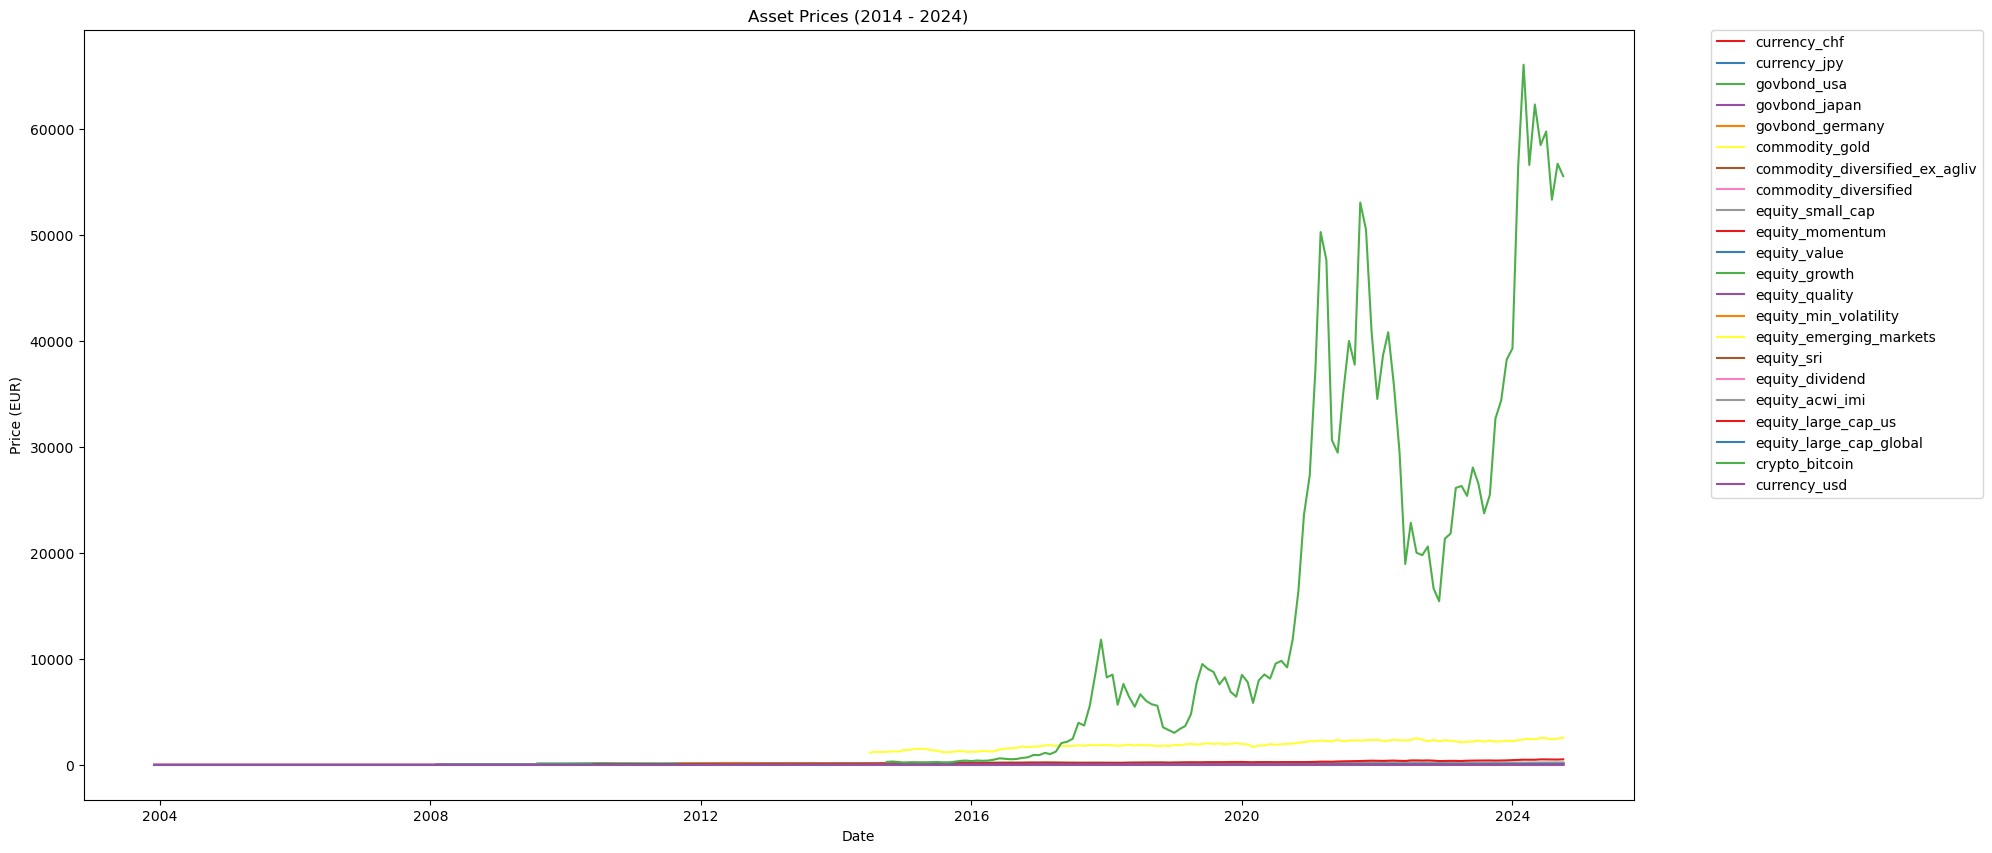

In [10]:
# Color palette for solid lines
color_palette = sns.color_palette("Set1", len(df_interim.columns))

# Create a line plot for all columns in df_interim
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_interim.columns):
    sns.lineplot(x=df_interim.index, y=df_interim[column], color=color_palette[i % len(color_palette)], linestyle="-", label=column)

# Add a title, axis labels, and a legend
plt.title('Asset Prices (2014 - 2024)')
plt.xlabel('Date')
plt.ylabel('Price (EUR)')

# Create legend outside of the plot, on the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.show()


Since ranges and base values differ greatly, prices are normalized to 100 and plotted again.

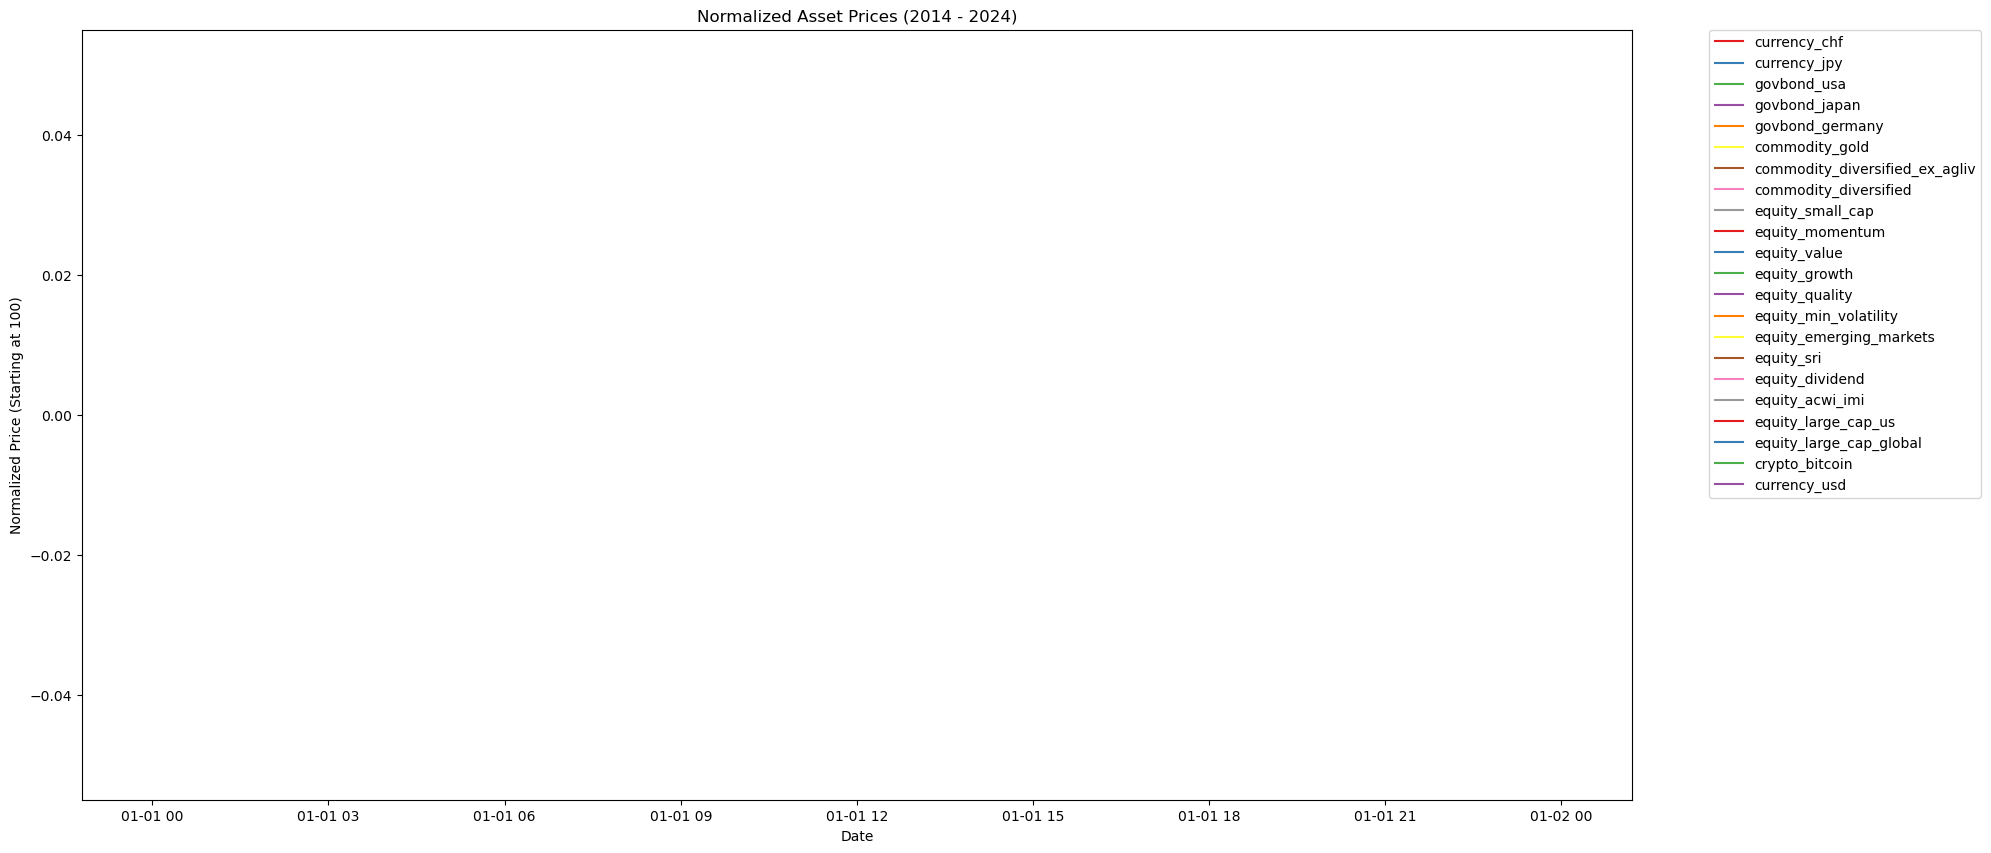

In [11]:
# Normalize the values so that each series starts at 100
df_normalized = df_interim.copy()

# Set the first value of each column as the baseline (100)
start_values = df_normalized.iloc[0]
df_normalized = df_normalized.div(start_values).multiply(100)

# Color palette for solid lines
color_palette = sns.color_palette("Set1", len(df_normalized.columns))

# Create a line plot for all columns in the normalized DataFrame
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_normalized.columns):
    sns.lineplot(x=df_normalized.index, y=df_normalized[column], color=color_palette[i % len(color_palette)], linestyle="-", label=column)

# Add a title, axis labels, and a legend
plt.title('Normalized Asset Prices (2014 - 2024)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Starting at 100)')

# Create a legend and display it
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.show()


Plot percentage return.

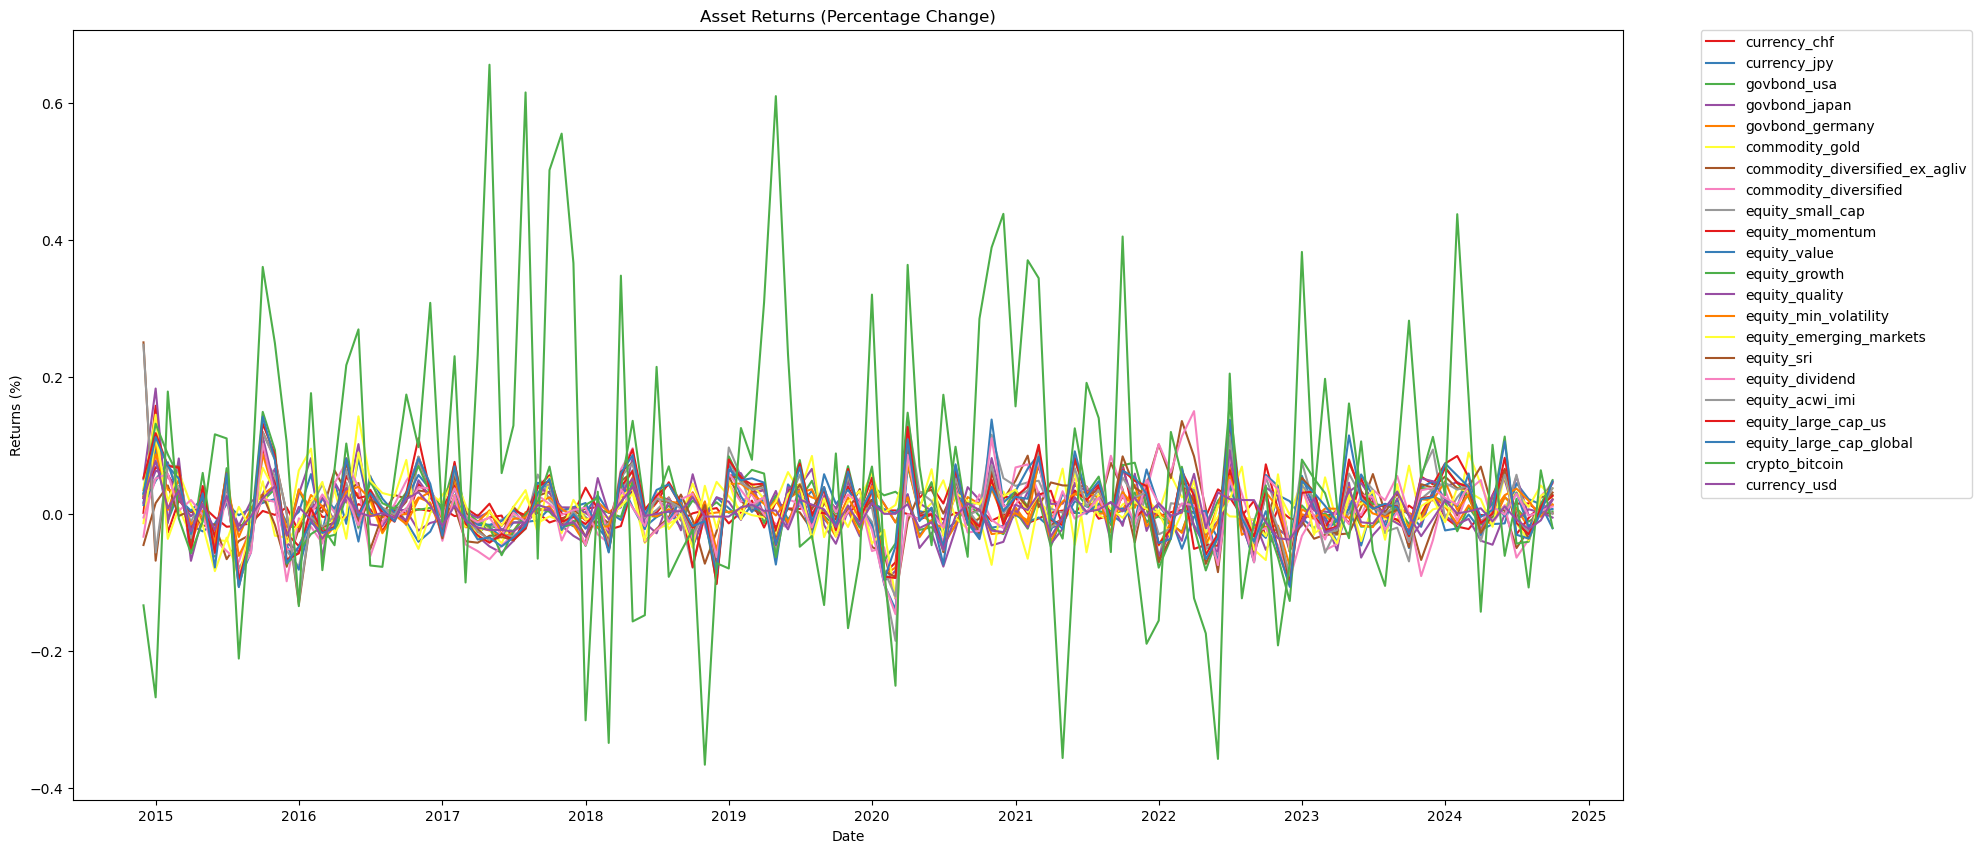

In [12]:
# Calculate percentage change for returns
df_returns = df_interim.pct_change().dropna()

# Color palette for solid lines
color_palette = sns.color_palette("Set1", len(df_returns.columns))

# Create a line plot for all columns in df_returns (percentage change)
plt.figure(figsize=(20, 10))

for i, column in enumerate(df_returns.columns):
    sns.lineplot(x=df_returns.index, y=df_returns[column], color=color_palette[i % len(color_palette)], linestyle="-", label=column)

# Add a title, axis labels, and a legend
plt.title('Asset Returns (Percentage Change)')
plt.xlabel('Date')
plt.ylabel('Returns (%)')

# Create legend and adjust the order to match the column names
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Display the plot
plt.show()


## Correlation between index returns

Check pairwise pearson correlation between index series using a heatmap to display the linear relation between asset returns.

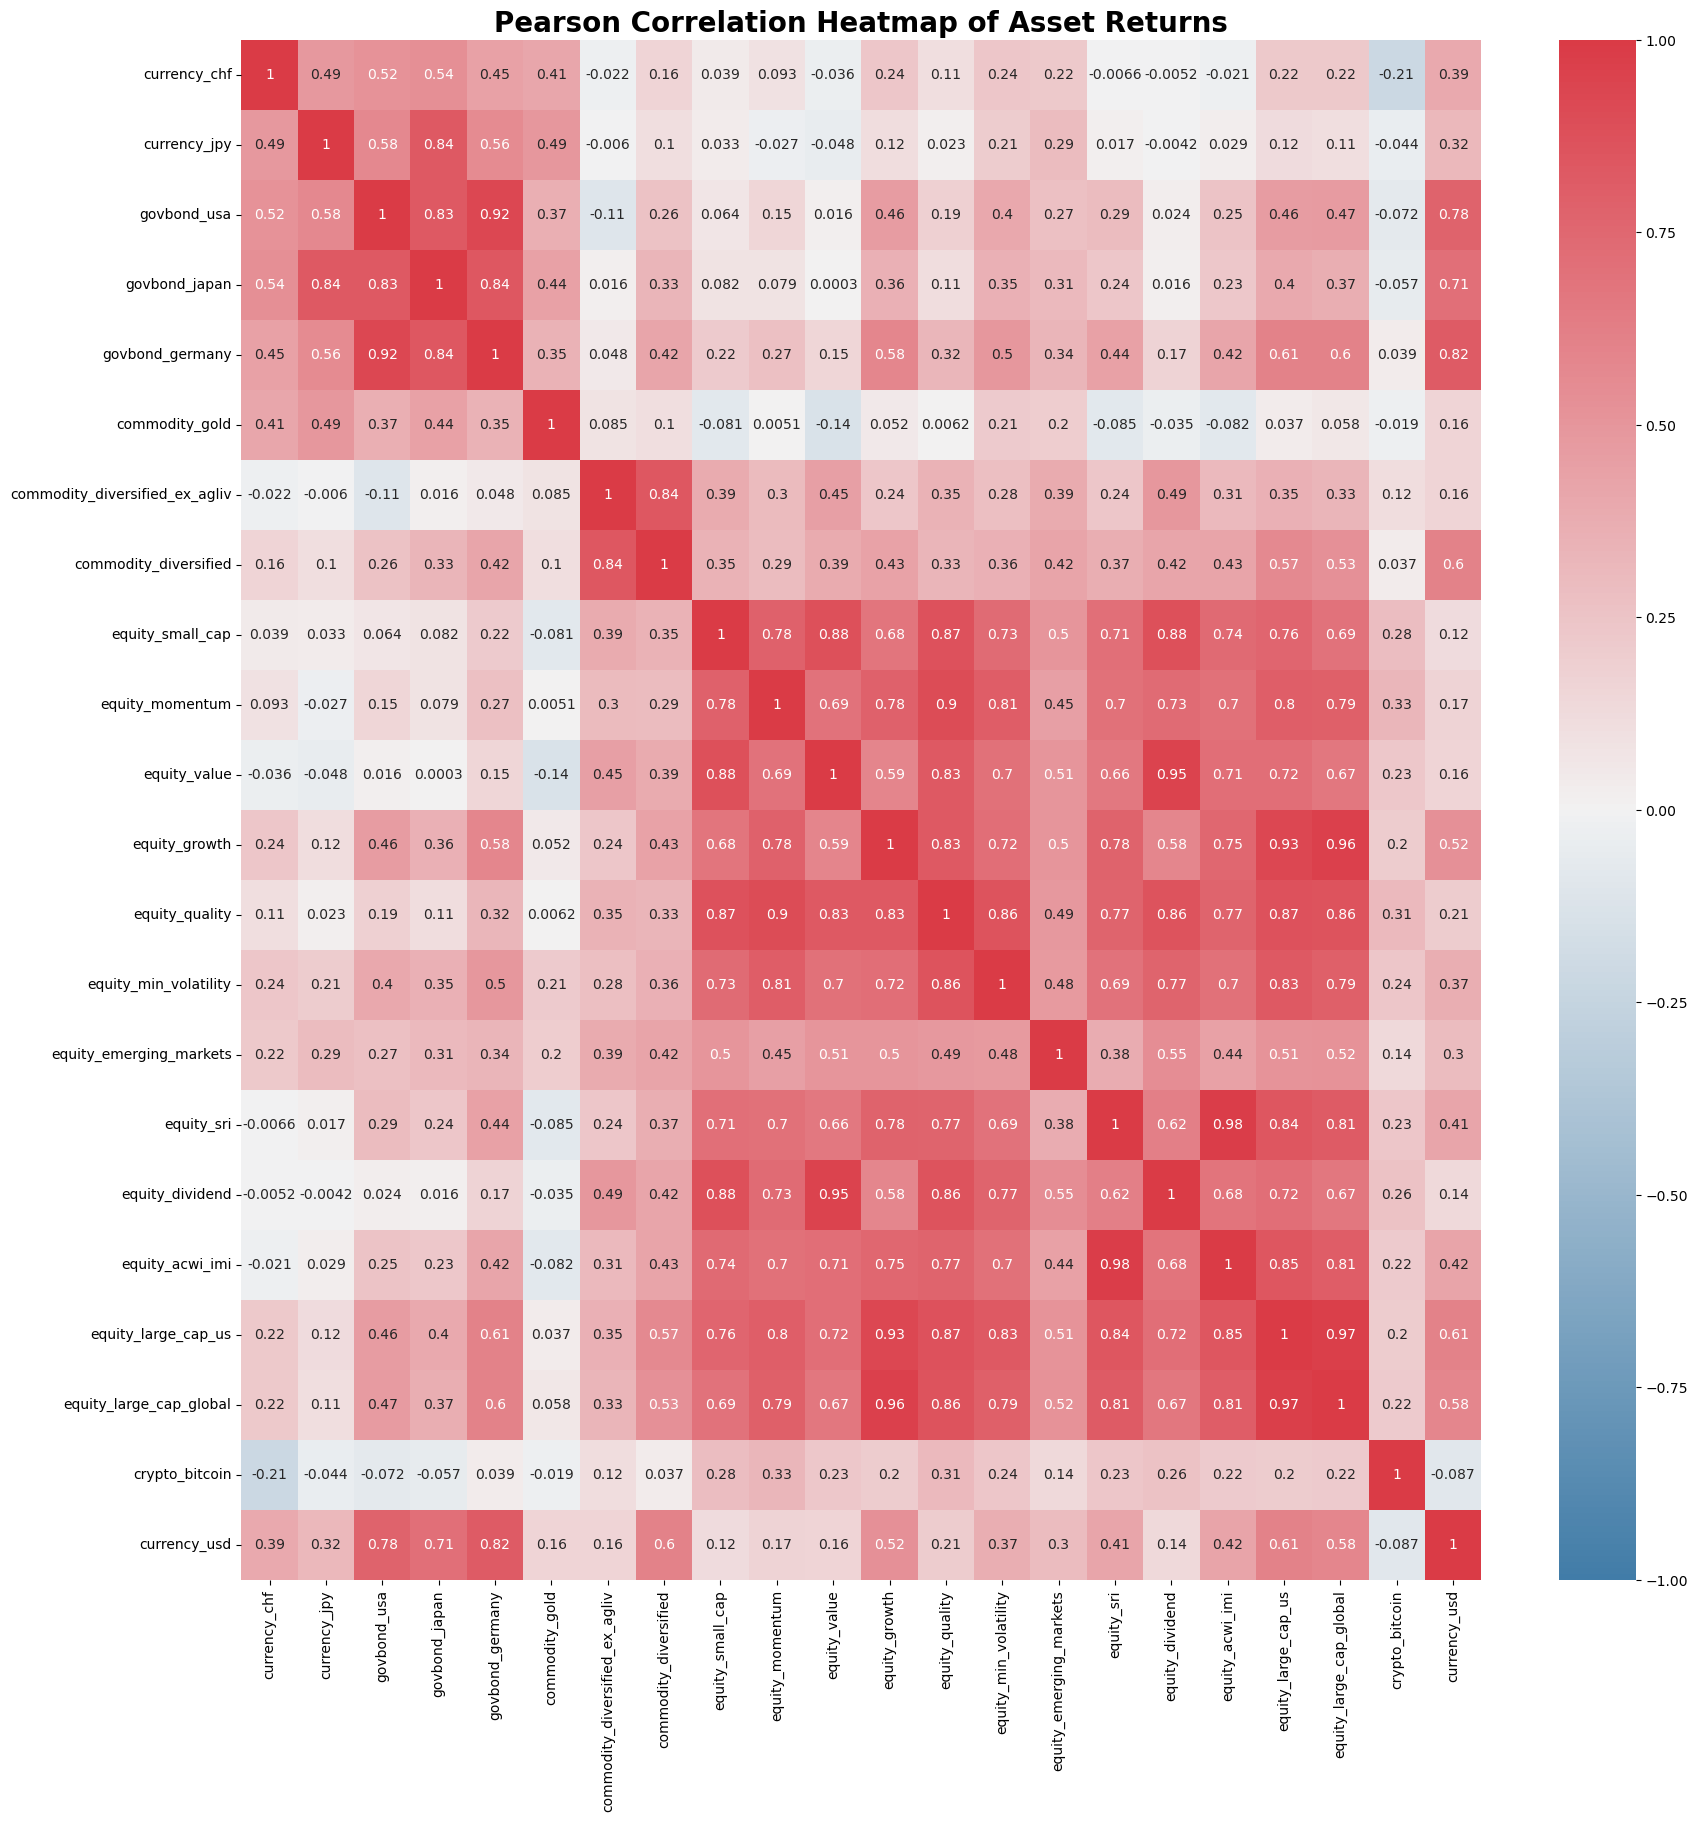

In [15]:
# Calculate the Pearson correlation matrix for the returns
correlation_matrix = df_returns.corr(method='pearson')

# Define a color palette from blue to white to red for better visualization
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Create the heatmap to display the Pearson correlation matrix
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)  # Plot the heatmap with annotations

# Set a more descriptive and formatted title for the plot
plt.title('Pearson Correlation Heatmap of Asset Returns', fontsize=20, fontweight='bold')  
plt.show()  # Display the plot
